루키즈 개발 5기 박미정

## 4-1. 인구현황 데이터 분석 (필수)

In [23]:
import pandas as pd

df = pd.read_csv('../data/인구현황.csv', encoding='utf-8')
df_except_all = df[df['행정기관'] != '전국']
df_sorted = df_except_all.sort_values(by='총인구수', ascending=False)

### 1. 지역별 총인구수 Top5

In [24]:
# '총인구수' 기준 내림차순 정렬 후 상위 5개 추출
top5_population = df_sorted.head(5)
result = top5_population[['행정기관', '총인구수']]
display(result)

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


In [ ]:
### 1-1. 지역별 총인구수 plot

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [15]:
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

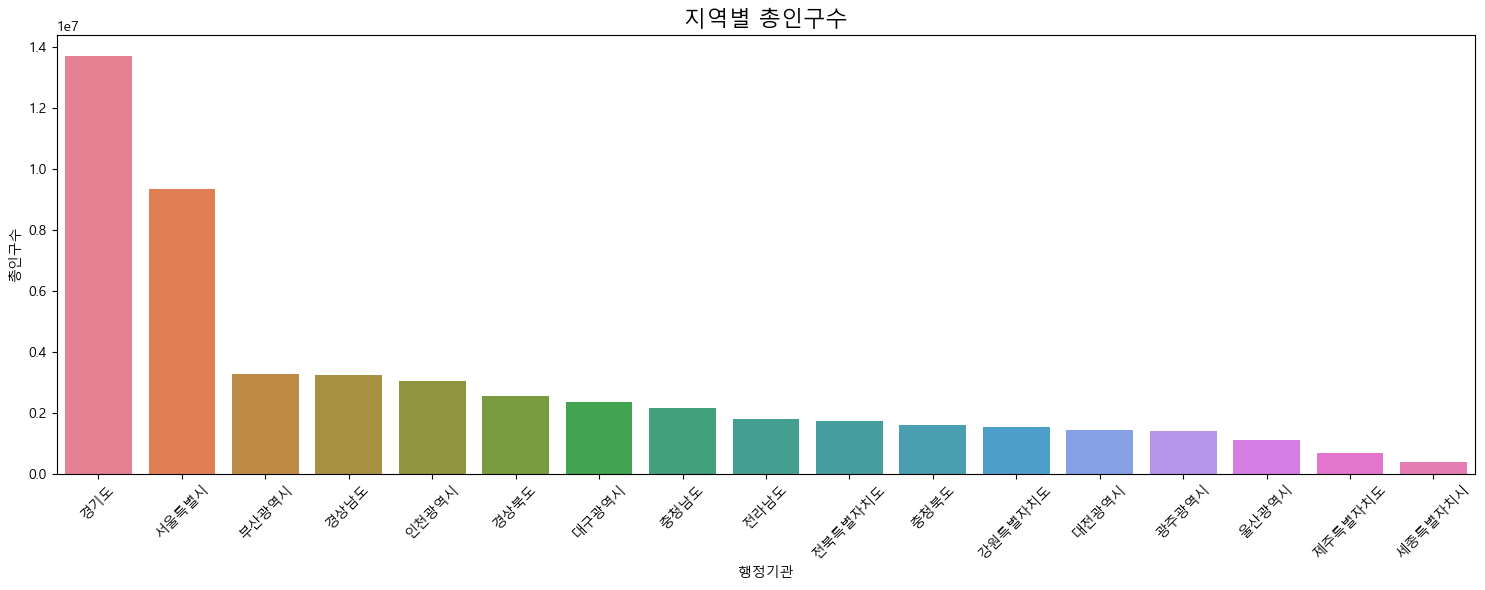

In [ ]:
plt.figure(figsize=(15, 6)) 

# sns.barplot을 사용해야 막대별로 다른 색상이 자동 할당
ax = sns.barplot(data=df_sorted, x='행정기관', y='총인구수', hue='행정기관', palette='husl', legend=False)

plt.title('지역별 총인구수', fontsize=16)
plt.xticks(rotation=45) # 지역명이 대각선으로 겹치지 않게 회전
plt.xlabel('행정기관')
plt.ylabel('총인구수')

plt.tight_layout()
plt.show()

### 2. 세대당 인구수 높은 지역 Top5

In [33]:
# 1. 데이터 복사본 생성 (경고 방지 및 기존 컬럼 활용)
df_household = df_except_all.copy()

# 2. '세대당 인구' 기준 내림차순 정렬 후 상위 5개 추출
top5_per_household = df_household.sort_values(by='세대당 인구', ascending=False).head(5)

# 3. 값 반올림 (이미지 예시와 동일하게 소수점 2자리)
top5_per_household['세대당 인구'] = top5_per_household['세대당 인구'].round(2)

# 4. 필요한 컬럼만 선택 및 인덱스 재설정
top5_per_household_result = top5_per_household[['행정기관', '세대당 인구']].reset_index(drop=True)

# 결과 출력
display(top5_per_household_result)

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


In [34]:
display(top5_per_household_result)

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


### 2-1. 지역별 세대당 인구 Plot

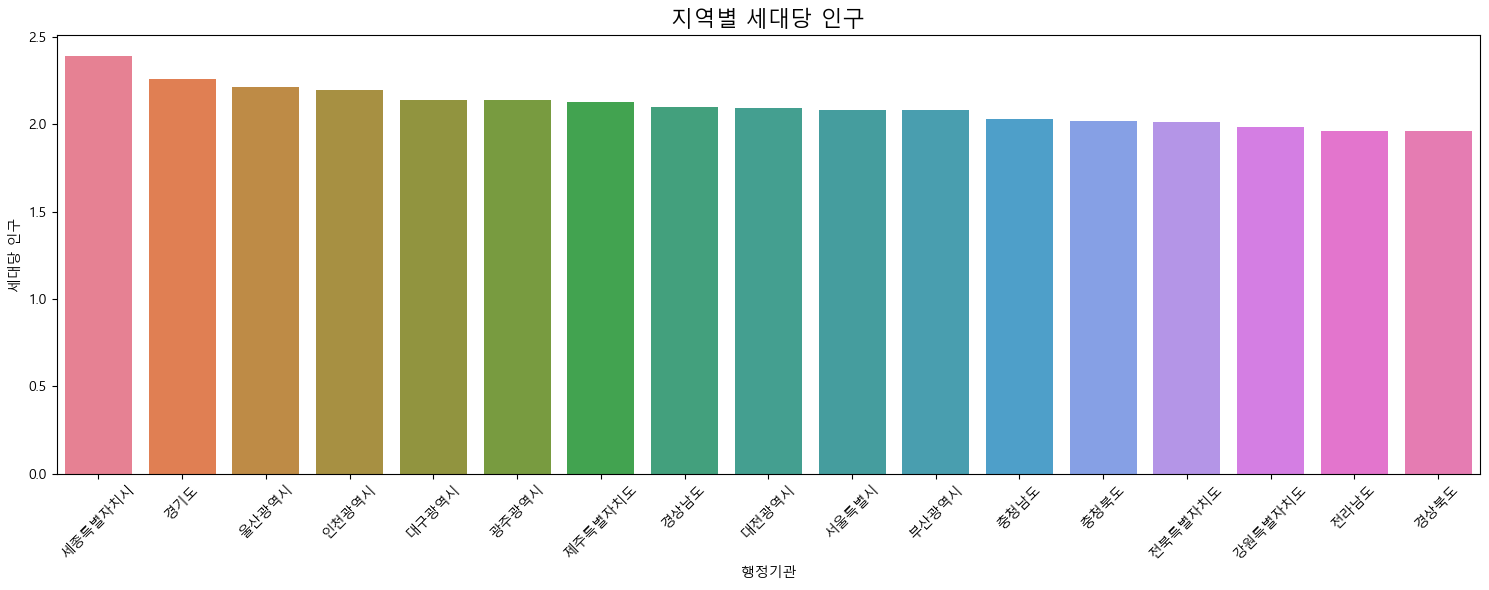

In [35]:
# '세대당 인구'를 기준으로 전체 데이터를 내림차순 정렬
df_sorted_household = df_except_all.sort_values(by='세대당 인구', ascending=False)

# 시각화 설정
plt.figure(figsize=(15, 6))

# 막대 그래프 생성 (palette='husl'을 사용하여 이미지와 유사한 다채로운 색상 적용)
ax = sns.barplot(data=df_sorted_household, x='행정기관', y='세대당 인구', hue='행정기관', palette='husl', legend=False)

# 그래프 제목 및 라벨 설정
plt.title('지역별 세대당 인구', fontsize=16)
plt.xticks(rotation=45)  # x축 지역명을 45도 회전하여 겹침 방지
plt.xlabel('행정기관')
plt.ylabel('세대당 인구')

# 레이아웃 최적화 및 출력
plt.tight_layout()
plt.show()

### 3. 남녀 비율 분석

In [ ]:
# 1. '남여 비율' 기준 내림차순 정렬
# sort_values: 복사본으로 작업
df_gender_ratio = df_except_all.sort_values(by='남여 비율', ascending=False)

# 2. 소수점 둘째 자리까지 반올림 (이미지 예시와 동일하게 설정)
df_gender_ratio['남여 비율'] = df_gender_ratio['남여 비율'].round(2)

# 3. 필요한 컬럼('행정기관', '남여 비율')만 선택하여 출력
result_3 = df_gender_ratio[['행정기관', '남여 비율']].reset_index(drop=True)
display(result_3)

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


### 3-1. 남녀 비율 분석 Plot

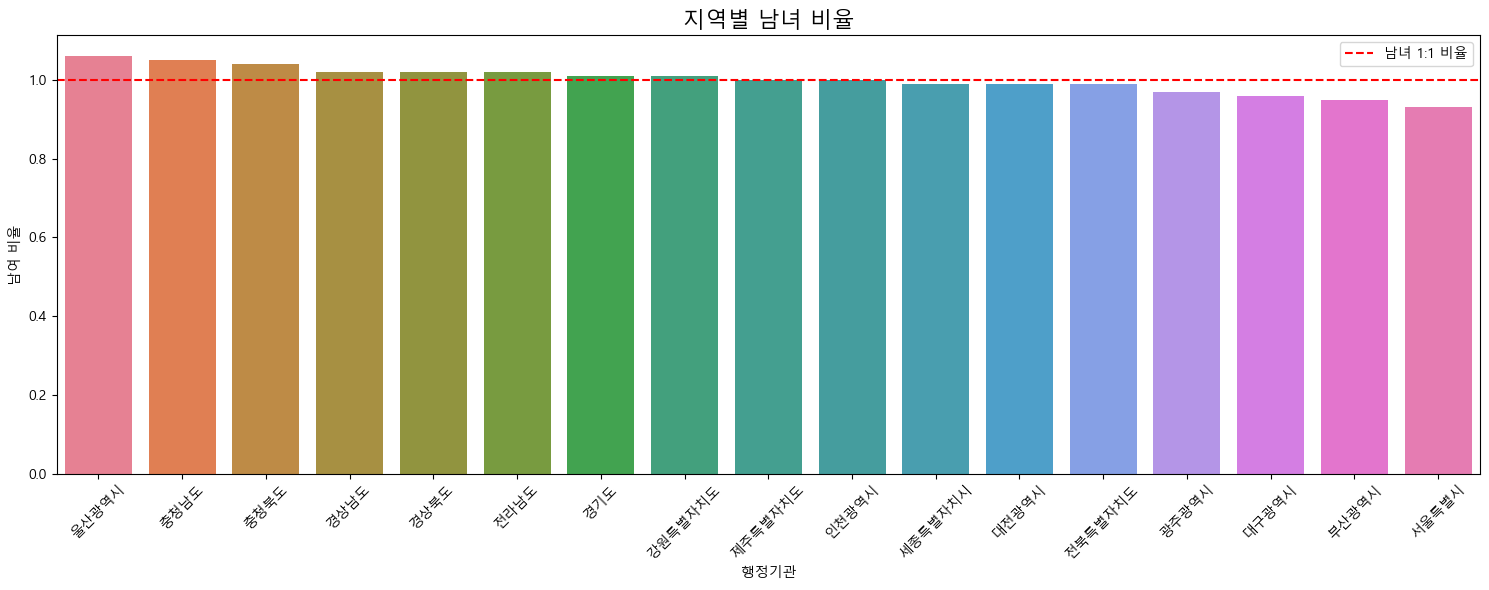

In [37]:
# 시각화 설정
plt.figure(figsize=(15, 6))

# 남여 비율 시각화 (기존 정렬된 데이터 사용)
ax = sns.barplot(data=df_gender_ratio, x='행정기관', y='남여 비율', hue='행정기관', palette='husl', legend=False)

# 기준선 추가: label 파라미터를 사용하여 범례 이름 지정
plt.axhline(1, color='red', linestyle='--', linewidth=1.5, label='남녀 1:1 비율')

# 범례 표시 호출
plt.legend()

plt.title('지역별 남녀 비율', fontsize=16)
plt.xticks(rotation=45) # 지역명 겹침 방지
plt.xlabel('행정기관')
plt.ylabel('남여 비율')

plt.tight_layout()
plt.show()